<a href="https://colab.research.google.com/github/LILY-182/complete-timeseries-sales-analysis/blob/main/timeseriesSupermarketsalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Supermarket sales data: Exploratory data analysis time series.

<img src="https://lh3.googleusercontent.com/drive-storage/AJQWtBMSRWHH0f9XSszDRZLxxGNSXFNmj5e3H7fpbP7ezMKdWFetJiXEwLn747PKIeuk5CgSNLqBr2lKzmrG6LcCVEcg6X82OmNah1jIrVtCzs7__g=w1035-h816">

###overview
A supermarket chain is looking to expand their business. The company leadership team has provided the data team with historical supermarket sales data. Leadership is interested in finding answers to several questions
1. what is the average purchase total of a customers cart
2. what is the average overal customer rating
3. how do customer rating compare at each of our 3 branches
4. which region is the most profitable one
5. do memebers spend more than non members?
6. which is the best product selling line.
7. how do sales flactuate during the week? Which is the most profitable day of the week

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/supermarket_sales - Sheet1.csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [5]:
#generating dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
#checking the empties
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


The dataset have a total of 1000 sales records, with no empty record to be filled or removed

In [7]:
#date column analysis (Time series analysis)
df['Date']

,Date
0,1/5/2019
1,3/8/2019
2,3/3/2019
3,1/27/2019
4,2/8/2019
...,...
995,1/29/2019
996,3/2/2019
997,2/9/2019
998,2/22/2019


The Date column is currently storing the date of transactions as string objects. Converting the dates from string objects to datetime objects will allow us to more easily sort and filter transactions by date, perform time series analysis, and visualize sales metrics over time

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']
#Examine the data to check successful date conversion

,Date
0,2019-01-05
1,2019-03-08
2,2019-03-03
3,2019-01-27
4,2019-02-08
...,...
995,2019-01-29
996,2019-03-02
997,2019-02-09
998,2019-02-22


the dates are now listed as datetime64, as expected. lets change the index where evry sale will be ordered by date

In [9]:
#use the date as index
df.set_index('Date', inplace=True)
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-29,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,13:46,Ewallet,40.35,4.761905,2.0175,6.2
2019-03-02,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,17:16,Ewallet,973.80,4.761905,48.6900,4.4
2019-02-09,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,13:22,Cash,31.84,4.761905,1.5920,7.7


In [10]:
#sort the dates, from the earliest to the latest
df.sort_index(inplace=True)
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-01,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,19:31,Cash,168.96,4.761905,8.448,6.3
2019-01-01,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,13:55,Cash,591.66,4.761905,29.583,7.7
2019-01-01,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,14:47,Cash,380.72,4.761905,19.036,5.7
2019-01-01,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,20:26,Ewallet,108.16,4.761905,5.408,6.9
2019-01-01,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,11:43,Cash,125.74,4.761905,6.287,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-30,743-04-1105,B,Mandalay,Member,Male,Health and beauty,97.22,9,43.749,918.729,14:43,Ewallet,874.98,4.761905,43.749,6.0
2019-03-30,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,12:51,Credit card,81.44,4.761905,4.072,9.5
2019-03-30,364-34-2972,C,Naypyitaw,Member,Male,Electronic accessories,96.82,3,14.523,304.983,20:37,Cash,290.46,4.761905,14.523,6.7


The previous index column has been successfully replaced by the Date column. We see that there are now 16 columns instead of the original 17. The dates are also correctly sorted from 2019-01-01 to 2019-03-30

In [11]:
#add a new column with the day of the week for later time series analysis

In [12]:
df['Day_of_Week'] = df.index.day_of_week
df.groupby('Day_of_Week').size()

,0
Day_of_Week,
0,125
1,158
2,143
3,138
4,139
5,164
6,133


In [13]:
#label encode the days of the wek from numerical representation to categoricak representations
df['Day_of_Week'] = df['Day_of_Week'].map({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day_of_Week
Date,,,,,,,,,,,,,,,,,
2019-01-01,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,19:31,Cash,168.96,4.761905,8.448,6.3,Tuesday
2019-01-01,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,13:55,Cash,591.66,4.761905,29.583,7.7,Tuesday
2019-01-01,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,14:47,Cash,380.72,4.761905,19.036,5.7,Tuesday
2019-01-01,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,20:26,Ewallet,108.16,4.761905,5.408,6.9,Tuesday
2019-01-01,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,11:43,Cash,125.74,4.761905,6.287,5.0,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-30,743-04-1105,B,Mandalay,Member,Male,Health and beauty,97.22,9,43.749,918.729,14:43,Ewallet,874.98,4.761905,43.749,6.0,Saturday
2019-03-30,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,12:51,Credit card,81.44,4.761905,4.072,9.5,Saturday
2019-03-30,364-34-2972,C,Naypyitaw,Member,Male,Electronic accessories,96.82,3,14.523,304.983,20:37,Cash,290.46,4.761905,14.523,6.7,Saturday


In [14]:
#number of transactions that occured in every branch A,B,C
df.groupby('Branch').size()

,0
Branch,
A,340
B,332
C,328


In [15]:
#transaction per city
df.groupby('City').size()

,0
City,
Mandalay,332
Naypyitaw,328
Yangon,340


In [16]:
#branch A = 340 transactions, located in Yangon
#branch b = 332 transactions, located in manadalay
#branch C = 328 transactions, located in Naypyitaw

lets calculate statistical sammury about dtaset

In [17]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


##Observation
1. the avaerage customer rating was 6.97. min was 4.00 and the maximau was 10.00
2. the max quantity was 10, min quantity 1
3. highest unit price was 99, lowest 10

In [18]:
#data cleaning
#check and remove duplicates
df.duplicated().sum()

0

In [19]:
#remove unuseful columns
df.drop(columns=['gross margin percentage', 'gross income'], inplace=True)
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,Rating,Day_of_Week
Date,,,,,,,,,,,,,,,
2019-01-01,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,19:31,Cash,168.96,6.3,Tuesday
2019-01-01,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,13:55,Cash,591.66,7.7,Tuesday
2019-01-01,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,14:47,Cash,380.72,5.7,Tuesday
2019-01-01,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,20:26,Ewallet,108.16,6.9,Tuesday
2019-01-01,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,11:43,Cash,125.74,5.0,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-30,743-04-1105,B,Mandalay,Member,Male,Health and beauty,97.22,9,43.749,918.729,14:43,Ewallet,874.98,6.0,Saturday
2019-03-30,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,12:51,Credit card,81.44,9.5,Saturday
2019-03-30,364-34-2972,C,Naypyitaw,Member,Male,Electronic accessories,96.82,3,14.523,304.983,20:37,Cash,290.46,6.7,Saturday


In [20]:
#rename the cog(cost of good sold)presents goods before tax
df.rename(columns={'cogs': 'Pre-tax total'}, inplace=True)
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,Pre-tax total,Rating,Day_of_Week
Date,,,,,,,,,,,,,,,
2019-01-01,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,19:31,Cash,168.96,6.3,Tuesday
2019-01-01,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,13:55,Cash,591.66,7.7,Tuesday
2019-01-01,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,14:47,Cash,380.72,5.7,Tuesday
2019-01-01,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,20:26,Ewallet,108.16,6.9,Tuesday
2019-01-01,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,11:43,Cash,125.74,5.0,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-30,743-04-1105,B,Mandalay,Member,Male,Health and beauty,97.22,9,43.749,918.729,14:43,Ewallet,874.98,6.0,Saturday
2019-03-30,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,12:51,Credit card,81.44,9.5,Saturday
2019-03-30,364-34-2972,C,Naypyitaw,Member,Male,Electronic accessories,96.82,3,14.523,304.983,20:37,Cash,290.46,6.7,Saturday


In [21]:
#payment column analysis
#rename ewallet to E-Wallet
df.groupby('Payment').size()

,0
Payment,
Cash,344
Credit card,311
Ewallet,345


In [22]:
df['Payment'] = df['Payment'].replace('Ewallet', 'E-Wallet')
df.groupby('Payment').size()

,0
Payment,
Cash,344
Credit card,311
E-Wallet,345


##Data analysis
1. whats the overal customer rating for the supermarket. create a histogram for ratings across all 3 branches

Text(0, 0.5, 'Number of customers')

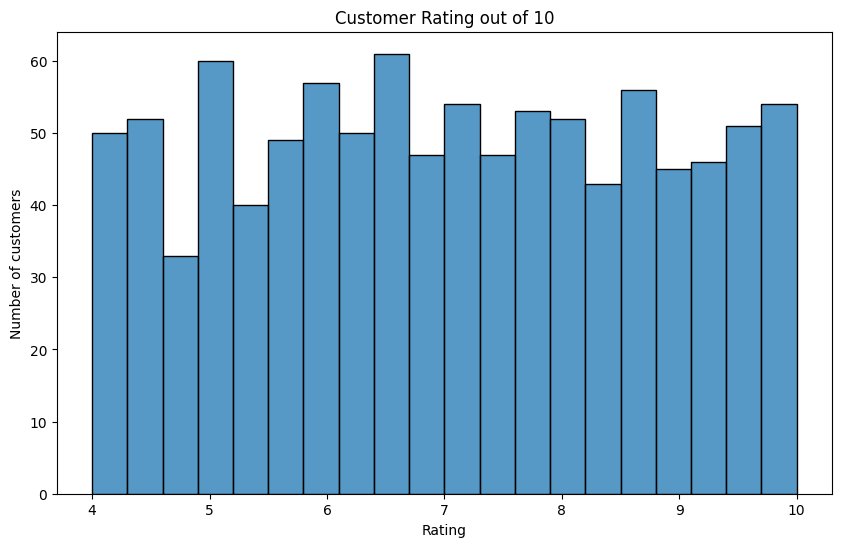

In [23]:
#viisualize the customer rating using histoplot
plt.figure(figsize=(10, 6))
sns.histplot(data = df, x= 'Rating', bins=20)
plt.title('Customer Rating out of 10')
plt.xlabel('Rating')
plt.ylabel('Number of customers')


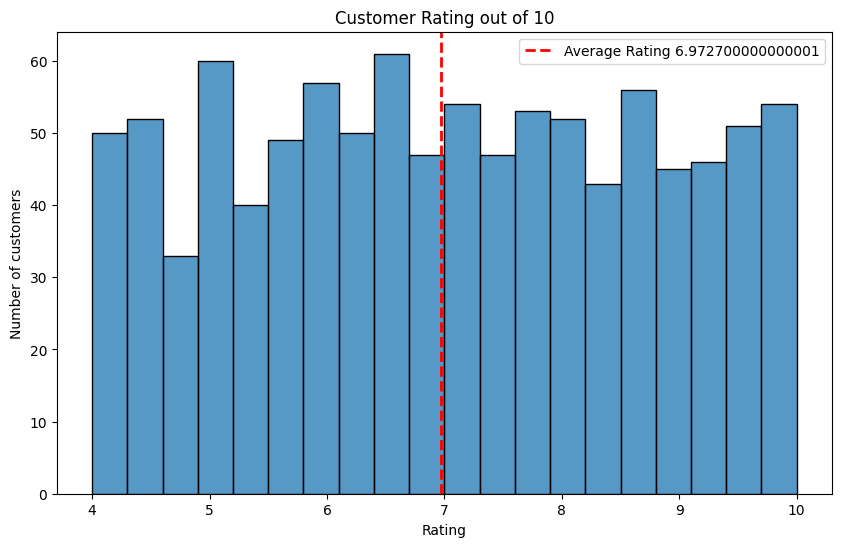

In [24]:
#add the average rating as a vertica
plt.figure(figsize=(10, 6))
sns.histplot(data = df, x= 'Rating', bins=20)
plt.title('Customer Rating out of 10')
plt.xlabel('Rating')
plt.ylabel('Number of customers')


average_rating = df['Rating'].mean()
average_rating

plt.axvline(average_rating, color='red', linestyle='dashed', linewidth=2)
plt.legend([f'Average Rating {average_rating}'])

1. There is a fairly even distribution of ratings from 4 - 10
2. The overall average rating was 6.97 out of 10
3. Although this data is historical, customer surveys could have been used to help identify the most common issues faced by customers

###How do customer ratings compre across the 3 branches

Now, let's examine each of the 3 branches of the supermarket to view their individual distributions of ratings. Is there a particular branch with lower customer satisfaction? Recall that Branch A of the supermarket is in Yangon, Branch B is in Mandalay, and Branch B is in Naypyitaw

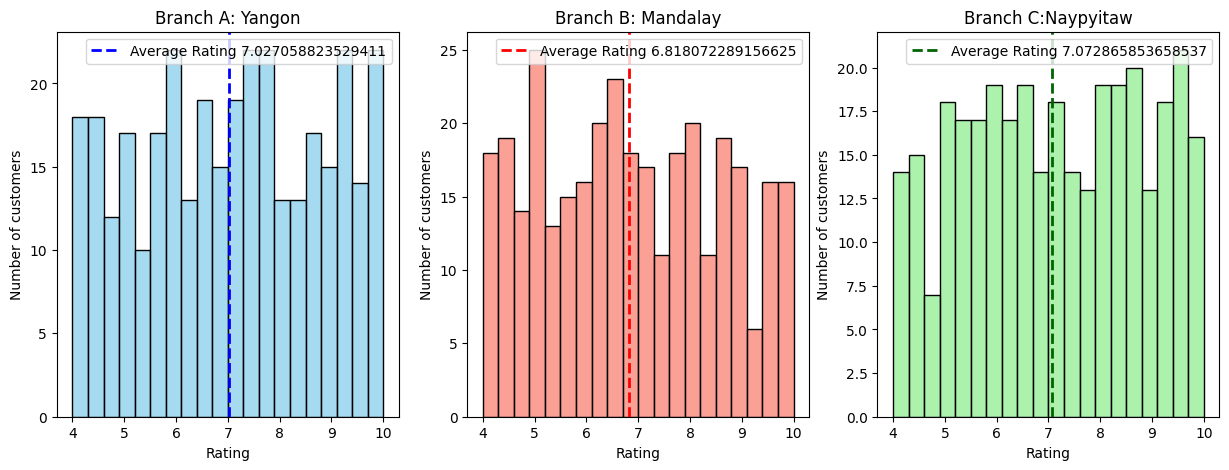

In [25]:
#create subsets where we filter each transaction based on the city
yangon_df = df[df['City'] == 'Yangon']
mandalay_df = df[df['City'] == 'Mandalay']
naypyitaw_df = df[df['City'] == 'Naypyitaw']

#set up 3 histograms side by side for hte 3 branches.
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

#plot the distribution of ratings for each branch
sns.histplot(data = yangon_df, x= 'Rating', bins=20, color = 'skyblue', ax=axes[0])
sns.histplot(data = mandalay_df, x= 'Rating', bins=20, color = 'salmon', ax=axes[1])
sns.histplot(data = naypyitaw_df, x= 'Rating', bins=20, color = 'lightgreen', ax=axes[2])

#add a title to each subplot
axes[0].set_title('Branch A: Yangon')
axes[1].set_title('Branch B: Mandalay')
axes[2].set_title('Branch C:Naypyitaw')

#x label as rating
axes[0].set_xlabel('Rating')
axes[1].set_xlabel('Rating')
axes[2].set_xlabel('Rating')
#set y lael as number of customers
axes[0].set_ylabel('Number of customers')
axes[1].set_ylabel('Number of customers')
axes[2].set_ylabel('Number of customers')

#set average rating for the 3 histograms as a dashed line
yangon_average_rating = yangon_df['Rating'].mean()
mandalay_average_rating = mandalay_df['Rating'].mean()
naypyitaw_average_rating = naypyitaw_df['Rating'].mean()

#draw the axv line for the 3 histograms
axes[0].axvline(yangon_average_rating, color='blue', linestyle='dashed', linewidth=2)
axes[0].legend([f'Average Rating {yangon_average_rating}'])
axes[1].axvline(mandalay_average_rating, color='red', linestyle='dashed', linewidth=2)
axes[1].legend([f'Average Rating {mandalay_average_rating}'])
axes[2].axvline(naypyitaw_average_rating, color='darkgreen', linestyle='dashed', linewidth=2)
axes[2].legend([f'Average Rating {naypyitaw_average_rating}'])



*   the rating distribution were relatively similar across the 3 bramxhes
*   the diff in average rating btwn the 3 branches was relatively small


*   the third branch had the highest rating at 7.07 in naypyitaww
*   the lowest branch was in mandalay with a rating of 6.8.





what is the percentage transaction that were made using the memebers card?
this question can be ansewerd correctly by using a pie chart. it'll show a ratio of the transactions for the card member holders and the others

<Axes: >

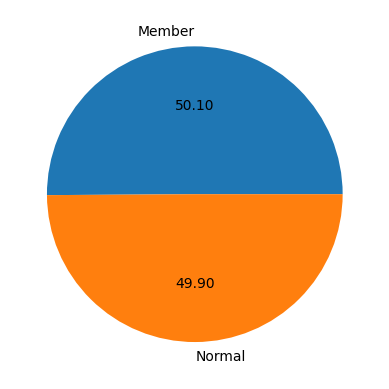

In [26]:
df.groupby('Customer type').size().plot(kind='pie', autopct='%.2f') #the %.2f means peercentage float to 2 decimal places



*   there is a roughly even split of consumption of those whore had had the cards vs those who dint have the cards
*   50.1% represented the tsransactions used by a members cards and 49.9 did not have card





1.   which product line drive the highest sales? which were the most common?
Now we can turn our attention to product line. if a particular product line is a significant driver of sales, the company can consider investing more into that product line. The company can also address lower performing product lines



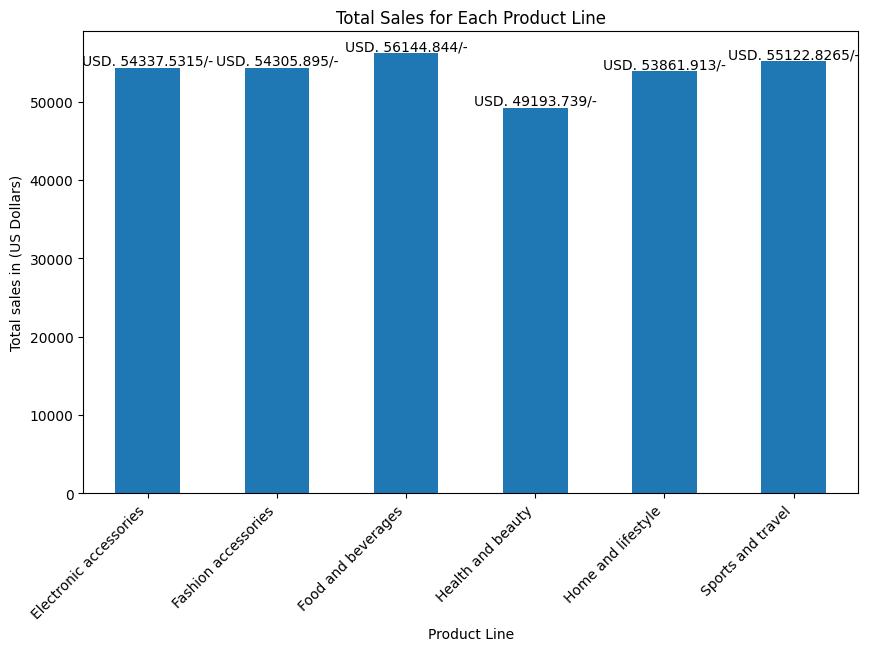

In [27]:
#create a dataframe where total revenue are grouped according tot the productline
productline_total = df.groupby('Product line').sum('Total')

#create another datframe where we are ordering form the higthest total revenue to the lowest
productline_total.sort_values(by='Total', ascending=False)

#let us visualize product line totals
plt.figure(figsize=(10,6))
ax = productline_total['Total'].plot(kind='bar')
#add axis labels
plt.title('Total Sales for Each Product Line')
plt.xlabel('Product Line')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylabel('Total sales in (US Dollars)')

for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'USD. {bar.get_height()}/-', ha='center', va='bottom')





*  "Food and Beverages" was the top selling product line with USD 56144.844/- in sales.
*  The next few product lines of "sports and travel", "electronic accessories", "fashion accessories", and "Home and lifestyle" had similar total sales


*   "Health and Beauty" was the lowest selling product line with Ks. 49193.739/- in sales
*   List item





###how did the product line perfom in different gender categories

---



In [28]:
#lets start by examining the gender categoriesin the supermarket
df.head()
df.groupby('Gender').size()

,0
Gender,
Female,501
Male,499


the dataset contains 501 transactions that were made by femlaes and 499 made by males

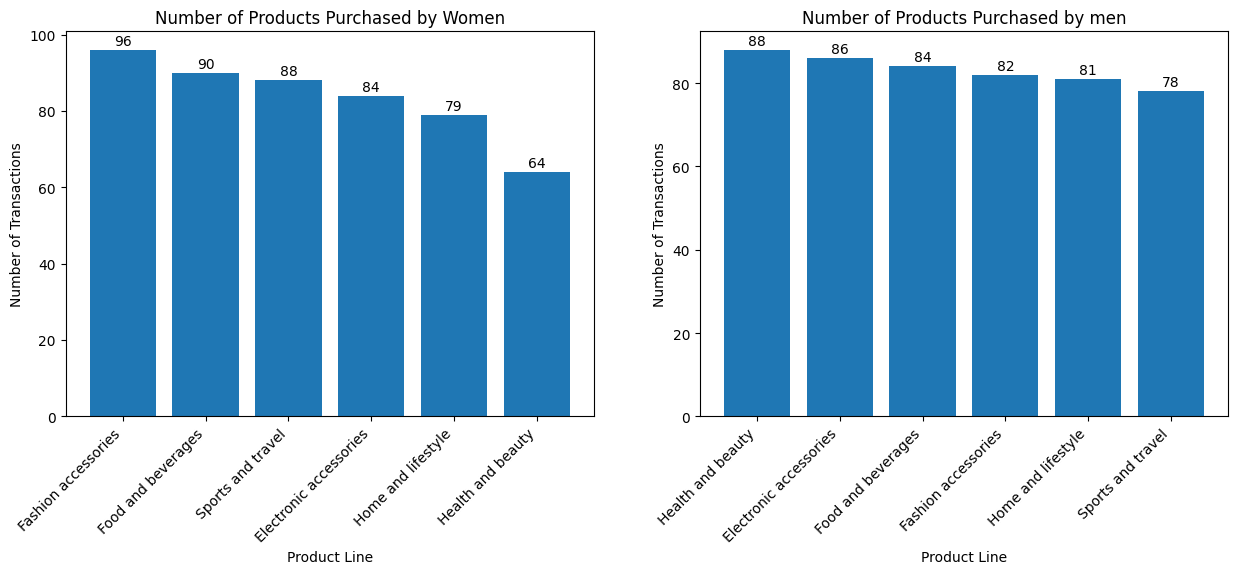

In [29]:
#now lets compare product line between women and men
#create 2 dseperate dataframes that seperate men and women transacton

women_df = df[df['Gender'] =='Female']
men_df = df[df['Gender'] == 'Male']

#lets seperate productline that were bought by men and women
women_productline_count = women_df['Product line'].value_counts()
men_productline_count = men_df['Product line'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
#women purchases
#x axis - index > products line
axes[0].bar(women_productline_count.index, women_productline_count.values)
axes[0].set_title('Number of Products Purchased by Women')
axes[0].set_xlabel('Product Line')
axes[0].set_xticks(axes[0].get_xticks())
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_ylabel('Number of Transactions')
#men
axes[1].bar(men_productline_count.index, men_productline_count.values)
axes[1].set_title('Number of Products Purchased by men')
axes[1].set_xlabel('Product Line')
axes[1].set_xticks(axes[1].get_xticks())
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_ylabel('Number of Transactions')

#add the total number of transaction
for bar in axes[0].patches:
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{bar.get_height()}', ha='center', va='bottom')

for bar in axes[1].patches:
    axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{bar.get_height()}', ha='center', va='bottom')



*   Women and men were roughly equally represented in the dataset.
*  The "Fashion accessories" product line was most popular with women with 96 transactions. It was 4th popular for men with 82 transactions

*   The "Health and Beauty" product line was most popular with men with 88 transactions. However, "Health and Beauty" was least popular with women at 64 transactions.
*   The "Health and Beauty" product line was most popular with men with 88 transactions. However, "Health and Beauty" was least popular with women at 64 transactions.





How do sales faltuate over time?

In [38]:
#how do the sales data flactuate over time? 3 months of data

#Group data by date
df.head(2)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,Pre-tax total,Rating,Day_of_Week
Date,,,,,,,,,,,,,,,
2019-01-01,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,19:31,Cash,168.96,6.3,Tuesday
2019-01-01,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,13:55,Cash,591.66,7.7,Tuesday


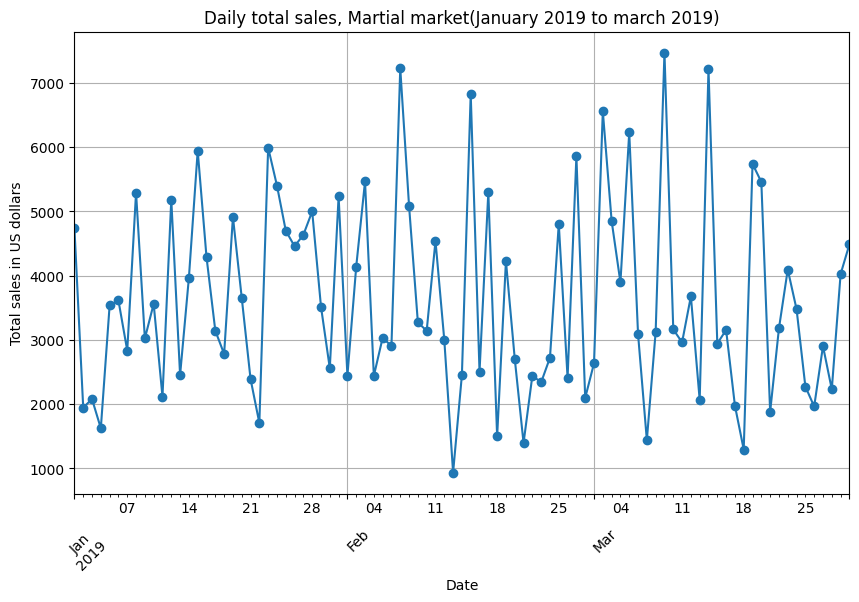

In [37]:
daily_sales = df.groupby('Date')['Total'].sum()
daily_sales

#plot the line chart, to display time series analysis

plt.figure(figsize=(10,6))
daily_sales.plot(marker='o', linestyle='-')
plt.title('Daily total sales, Martial market(January 2019 to march 2019)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Total sales in US dollars')

plt.grid(True)
plt.show()



*   The daily sales tend to flatuate at a fair amount

*   The day with the lowest sales was February 13th and it was on a wednesday
*   The highest sales were on March 9th and it was on a Saturday


*   List item



One hypothesis might be that weekends have higher sales than weekdays.
Lets prove to either accept or reject the hypothesis

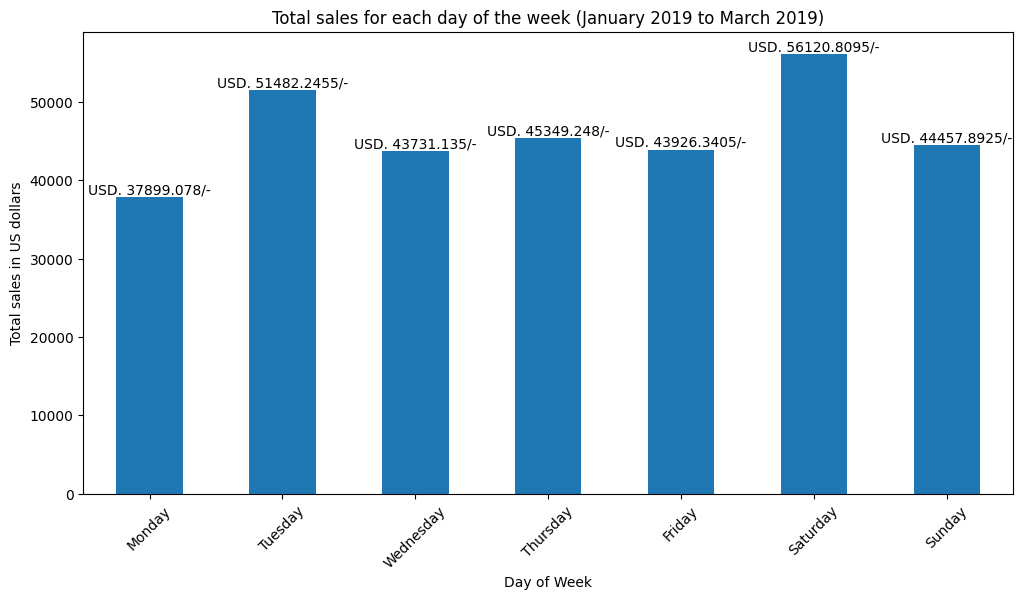

In [44]:
#create a series of the total sales for each day of the week for the entire 3 months period.
dayofweek_total = df.groupby('Day_of_Week')['Total'].sum()

#we arrange the days of theb week to follow the common order

dayofweek_total=dayofweek_total.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
dayofweek_total

#plot the bar chart
plt.figure(figsize=(12,6))
ax = dayofweek_total.plot(kind='bar')

#add lables and titles
plt.title('Total sales for each day of the week (January 2019 to March 2019)')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.ylabel('Total sales in US dollars')

for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'USD. {bar.get_height()}/-', ha='center', va='bottom')



*  The best day of the week for sales was Saturdays with a combined sales of 56,120.80 USD
*   The worst day of the week for sales during the 3 months was Monday with a combined sales of 37,899.07 USD


*   Surprisingly, Tuesdays had the second highest sales
*   Sundays, Wednesdays,Thursdays and fridays had similar sales


